#  Data mining ISM6136 - Assignment05 
## group - Elite

### Members:
1. Rahul Reddy Vemparala  - U79474665
2. Nihar Reddy Lonka - U60570876
3. Sreeja  Katanguri - U89168040
4. Vineeth Lanka - U60221702
5. Akhila Siddabatula - U73439960
6. Kavya Reddy Basupalli - U22892161

# Dry Bean Dataset Data Set

## Dataset Information:
 Seven different types of dry beans were used in this research, taking into account the features such as form, shape, type, and structure by the market situation. A computer vision system was developed to distinguish seven different registered varieties of dry beans with similar features in order to obtain uniform seed classification. For the classification model, images of 13,611 grains of 7 different registered dry beans were taken with a high-resolution camera. Bean images obtained by computer vision system were subjected to segmentation and feature extraction stages, and a total of 16 features; 12 dimensions and 4 shape forms, were obtained from the grains 

## Requirement: 
1. Using the above dataset, creating and “tuning” the following classification models:

      K-NN
    Decision Tree 
    Random Forest
    AdaBoost
    GradientDescent
    XGBoost
    and evaluating the performance of the each model and recommending which model can be used for best performance.






# Resources and Acknowlegments: [reference link](http://archive.ics.uci.edu/ml/datasets/Dry+Bean+Dataset)




## Import the necessary libraries 

In [8]:
import pandas as pd
import numpy as np

import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import  confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report,make_scorer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV,RandomizedSearchCV
from sklearn import preprocessing 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier



## Load input data into the notebook

In [9]:
# input file path 
input_file_path = "Dry_Bean_Dataset.csv"

# read csv into pandas dataframe
df = pd.read_csv(input_file_path)
df.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


# Cleaning and transforming data

In [10]:
df.columns = [s.strip().upper().replace(' ', '_') for s in df.columns] 
df.columns

Index(['AREA', 'PERIMETER', 'MAJORAXISLENGTH', 'MINORAXISLENGTH',
       'ASPECTRATION', 'ECCENTRICITY', 'CONVEXAREA', 'EQUIVDIAMETER', 'EXTENT',
       'SOLIDITY', 'ROUNDNESS', 'COMPACTNESS', 'SHAPEFACTOR1', 'SHAPEFACTOR2',
       'SHAPEFACTOR3', 'SHAPEFACTOR4', 'CLASS'],
      dtype='object')

# handling missing values

In [11]:
# check for missing values
df.isnull().sum()


AREA               0
PERIMETER          0
MAJORAXISLENGTH    0
MINORAXISLENGTH    0
ASPECTRATION       0
ECCENTRICITY       0
CONVEXAREA         0
EQUIVDIAMETER      0
EXTENT             0
SOLIDITY           0
ROUNDNESS          0
COMPACTNESS        0
SHAPEFACTOR1       0
SHAPEFACTOR2       0
SHAPEFACTOR3       0
SHAPEFACTOR4       0
CLASS              0
dtype: int64

In [12]:
# type conversion of target column 

print(df.CLASS.unique())
df.CLASS = df.CLASS.astype('category')
df.describe()

['SEKER' 'BARBUNYA' 'BOMBAY' 'CALI' 'HOROZ' 'SIRA' 'DERMASON']


,AREA,PERIMETER,MAJORAXISLENGTH,MINORAXISLENGTH,ASPECTRATION,ECCENTRICITY,CONVEXAREA,EQUIVDIAMETER,EXTENT,SOLIDITY,ROUNDNESS,COMPACTNESS,SHAPEFACTOR1,SHAPEFACTOR2,SHAPEFACTOR3,SHAPEFACTOR4
count,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000
mean,53048.284549,855.283459,320.141867,202.270714,1.583242,0.750895,53768.200206,253.064220,0.749733,0.987143,0.873282,0.799864,0.006564,0.001716,0.643590,0.995063
std,29324.095717,214.289696,85.694186,44.970091,0.246678,0.092002,29774.915817,59.177120,0.049086,0.004660,0.059520,0.061713,0.001128,0.000596,0.098996,0.004366
min,20420.000000,524.736000,183.601165,122.512653,1.024868,0.218951,20684.000000,161.243764,0.555315,0.919246,0.489618,0.640577,0.002778,0.000564,0.410339,0.947687
25%,36328.000000,703.523500,253.303633,175.848170,1.432307,0.715928,36714.500000,215.068003,0.718634,0.985670,0.832096,0.762469,0.005900,0.001154,0.581359,0.993703
50%,44652.000000,794.941000,296.883367,192.431733,1.551124,0.764441,45178.000000,238.438026,0.759859,0.988283,0.883157,0.801277,0.006645,0.001694,0.642044,0.996386
75%,61332.000000,977.213000,376.495012,217.031741,1.707109,0.810466,62294.000000,279.446467,0.786851,0.990013,0.916869,0.834270,0.007271,0.002170,0.696006,0.997883
max,254616.000000,1985.370000,738.860154,460.198497,2.430306,0.911423,263261.000000,569.374358,0.866195,0.994677,0.990685,0.987303,0.010451,0.003665,0.974767,0.999733


In [13]:
#  encoding of CLASS variable

df['CLASS'] = df['CLASS'].replace('SEKER', 0)
df['CLASS'] = df['CLASS'].replace('BARBUNYA', 1)
df['CLASS'] = df['CLASS'].replace('BOMBAY', 2)
df['CLASS'] = df['CLASS'].replace('CALI', 3)
df['CLASS'] = df['CLASS'].replace('HOROZ', 4)
df['CLASS'] = df['CLASS'].replace('SIRA', 5)
df['CLASS'] = df['CLASS'].replace('DERMASON', 6)

In [14]:
df.head()

,AREA,PERIMETER,MAJORAXISLENGTH,MINORAXISLENGTH,ASPECTRATION,ECCENTRICITY,CONVEXAREA,EQUIVDIAMETER,EXTENT,SOLIDITY,ROUNDNESS,COMPACTNESS,SHAPEFACTOR1,SHAPEFACTOR2,SHAPEFACTOR3,SHAPEFACTOR4,CLASS
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,0
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,0
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,0
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,0
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,0


# train test partitioning of data

In [16]:
test_part_size_percent = 0.4 # for a 60/40 split ( as the given dataset is huge, i.e. around 10k records)

In [17]:
target = ['CLASS']
cols = list(df.columns)
for item in target:
    cols.remove(item)
    
y = df[target]
X = df[cols]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=test_part_size_percent, random_state=0)
print(len(y_train))

8166



## Transform predictors
### Some of  the values of the predictor columns for our input dataset are in different scales.Hence, we are standardizing the perdictors using standard scaler.

In [18]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# fitting the k-nn model for train dataset


In [20]:
# check for different groups and imbalances between the groups 
df.groupby(['CLASS'])['CLASS'].count()

CLASS
1    1322
2     522
3    1630
6    3546
4    1928
0    2027
5    2636
Name: CLASS, dtype: int64

1. clearly each class in our multinomial problem are not evenly distributed. Some have a larger group like 'DERMASON'(3546)
and others 'BOMBAY' with the least count 522. Therefore the weighted average of our metrics would be best suited.

In [42]:

knn = KNeighborsClassifier(n_neighbors=97,  metric='euclidean')
knn.fit(X_train, y_train.values.ravel())

y_pred = knn.predict(X_test)

# measuring various performance metrics for our k-nn model

In [24]:
confusion_matrix(y_test, y_pred)

array([[ 738,    9,    0,    0,    0,   34,   11],
       [   5,  432,    0,   46,    3,   33,    0],
       [   0,    0,  179,    1,    0,    0,    0],
       [   2,    6,    0,  637,    6,    7,    0],
       [   0,    1,    0,   22,  736,   18,    4],
       [   9,    1,    0,    5,   13,  959,  109],
       [  28,    1,    0,    0,    2,   76, 1312]], dtype=int64)

In [25]:
accuracy_score(y_test, y_pred)

0.9169880624426079

In [26]:
precision_score(y_test, y_pred, average=None)

array([0.94373402, 0.96      , 1.        , 0.89592124, 0.96842105,
       0.85093168, 0.91364903])

In [27]:
precision_score(y_test, y_pred, average='micro')

0.9169880624426079

In [28]:
precision_score(y_test, y_pred, average='macro')

0.9332367153940727

In [29]:
precision_score(y_test, y_pred, average='weighted')

0.9183874088608274

In [30]:
recall_score(y_test, y_pred, average=None)

array([0.93181818, 0.83236994, 0.99444444, 0.96808511, 0.94238156,
       0.875     , 0.92459479])

In [31]:
recall_score(y_test, y_pred, average='micro')

0.9169880624426079

In [32]:
recall_score(y_test, y_pred, average='macro')

0.9240991460002729

In [33]:
recall_score(y_test, y_pred, average='weighted')

0.9169880624426079

In [34]:
f1_score(y_test, y_pred, average=None)

array([0.93773825, 0.89164087, 0.99721448, 0.93060628, 0.95522388,
       0.86279802, 0.91908932])

In [35]:
f1_score(y_test, y_pred, average='micro')

0.9169880624426079

In [36]:
f1_score(y_test, y_pred, average='macro')

0.9277587283276565

In [37]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.93      0.94       792
           1       0.96      0.83      0.89       519
           2       1.00      0.99      1.00       180
           3       0.90      0.97      0.93       658
           4       0.97      0.94      0.96       781
           5       0.85      0.88      0.86      1096
           6       0.91      0.92      0.92      1419

    accuracy                           0.92      5445
   macro avg       0.93      0.92      0.93      5445
weighted avg       0.92      0.92      0.92      5445



In [38]:
avg_method = 'macro'
results = []
for avg_method in ['micro', 'macro', 'weighted']:
    for k in range(1,int(len(y_test)**0.5)*2,2): #  k values from 1 to root of n
        knn = KNeighborsClassifier(n_neighbors=k,  metric='euclidean')
        knn.fit(X_train, y_train.values.ravel())
        y_pred = knn.predict(X_test)

        results.append({ 
                'avg_method': avg_method,
                'k':k,
                'accuracy': accuracy_score(y_test, y_pred),
                'precision': precision_score(y_test, y_pred, average=avg_method, zero_division=0),
                'recall':recall_score(y_test, y_pred, average=avg_method),
                'f1': f1_score(y_test, y_pred, average=avg_method),
        })

In [39]:
results_df = pd.DataFrame(results)  
results_df

,avg_method,k,accuracy,precision,recall,f1
0,micro,1,0.904132,0.904132,0.904132,0.904132
1,micro,3,0.919743,0.919743,0.919743,0.919743
2,micro,5,0.923967,0.923967,0.923967,0.923967
3,micro,7,0.921212,0.921212,0.921212,0.921212
4,micro,9,0.924334,0.924334,0.924334,0.924334
...,...,...,...,...,...,...
214,weighted,137,0.913315,0.914950,0.913315,0.913277
215,weighted,139,0.912948,0.914663,0.912948,0.912920
216,weighted,141,0.912948,0.914607,0.912948,0.912899
217,weighted,143,0.913131,0.914777,0.913131,0.913096


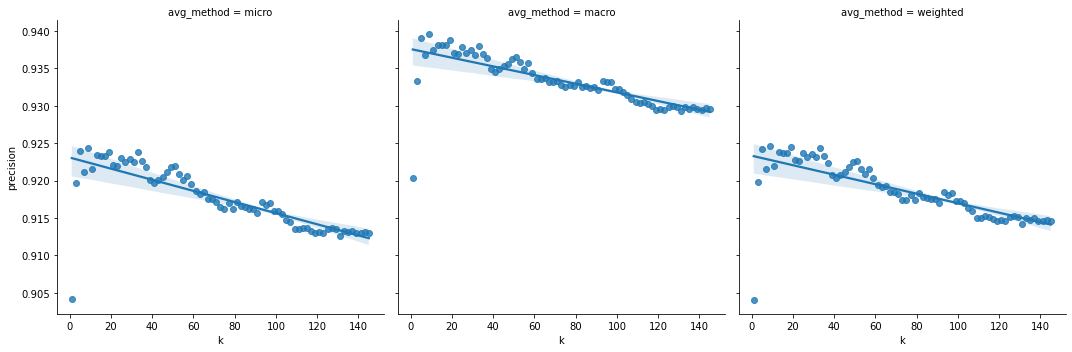

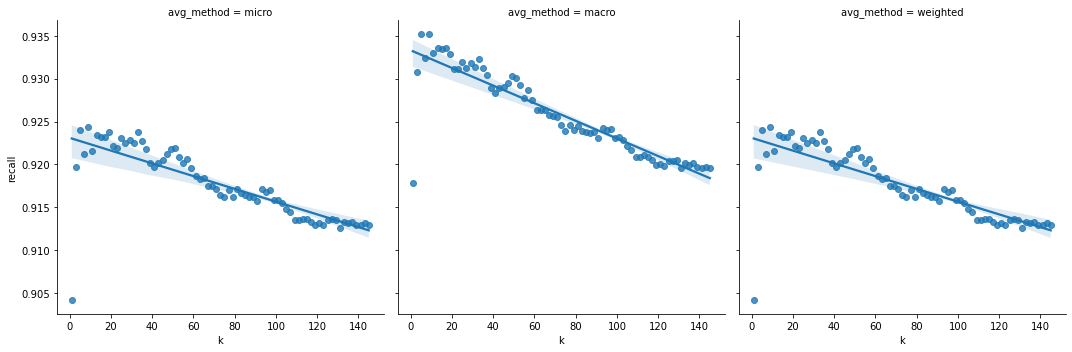

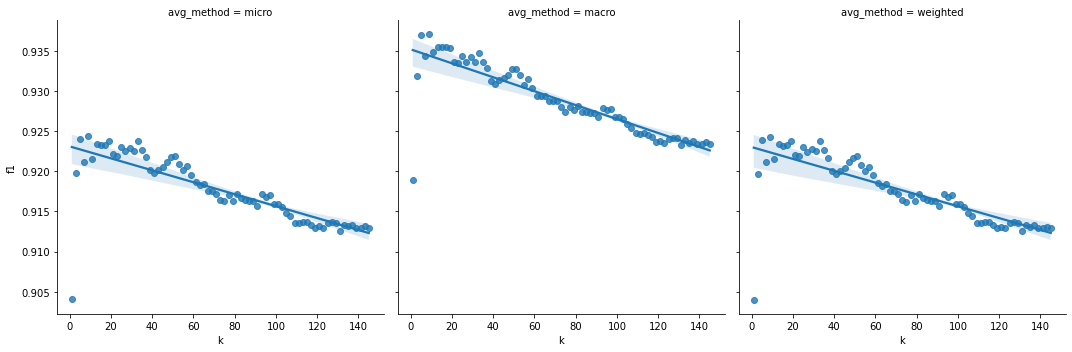

In [40]:


sns.lmplot(x='k', y='precision', col='avg_method',data=results_df)
sns.lmplot(x='k', y='recall', col='avg_method',data=results_df)
sns.lmplot(x='k', y='f1', col='avg_method',data=results_df)

# Analysis:
We wanted to prefer weighted average of the metrics for our multinomial problem due to the imbalance in data, but as we  tested the model for different k values with different average techniques, and plotting a graph against k and the respective metrics. We can see that the performance metrics are better in the scenario of "macro" average.

In [41]:
macro = results_df[results_df['avg_method'] =='macro']
max_metrics = macro[macro['precision'] == macro['precision'].max()]
print("Here is our best k-nn model for the given train dataset")
max_metrics

Here is our best k-nn model for the given train dataset


,avg_method,k,accuracy,precision,recall,f1
77,macro,9,0.924334,0.939645,0.935238,0.93712


# Fitting a D-tree for our train dataset

In [168]:
# first lets try to fit a decision tree with no constraints(No pruning applied)
target = 'CLASS'
predictors = list(df.columns)
predictors.remove(target)
X = df[predictors]
y = df[target]

classTree = DecisionTreeClassifier(random_state=1)
_ = classTree.fit(X.values, y.values)

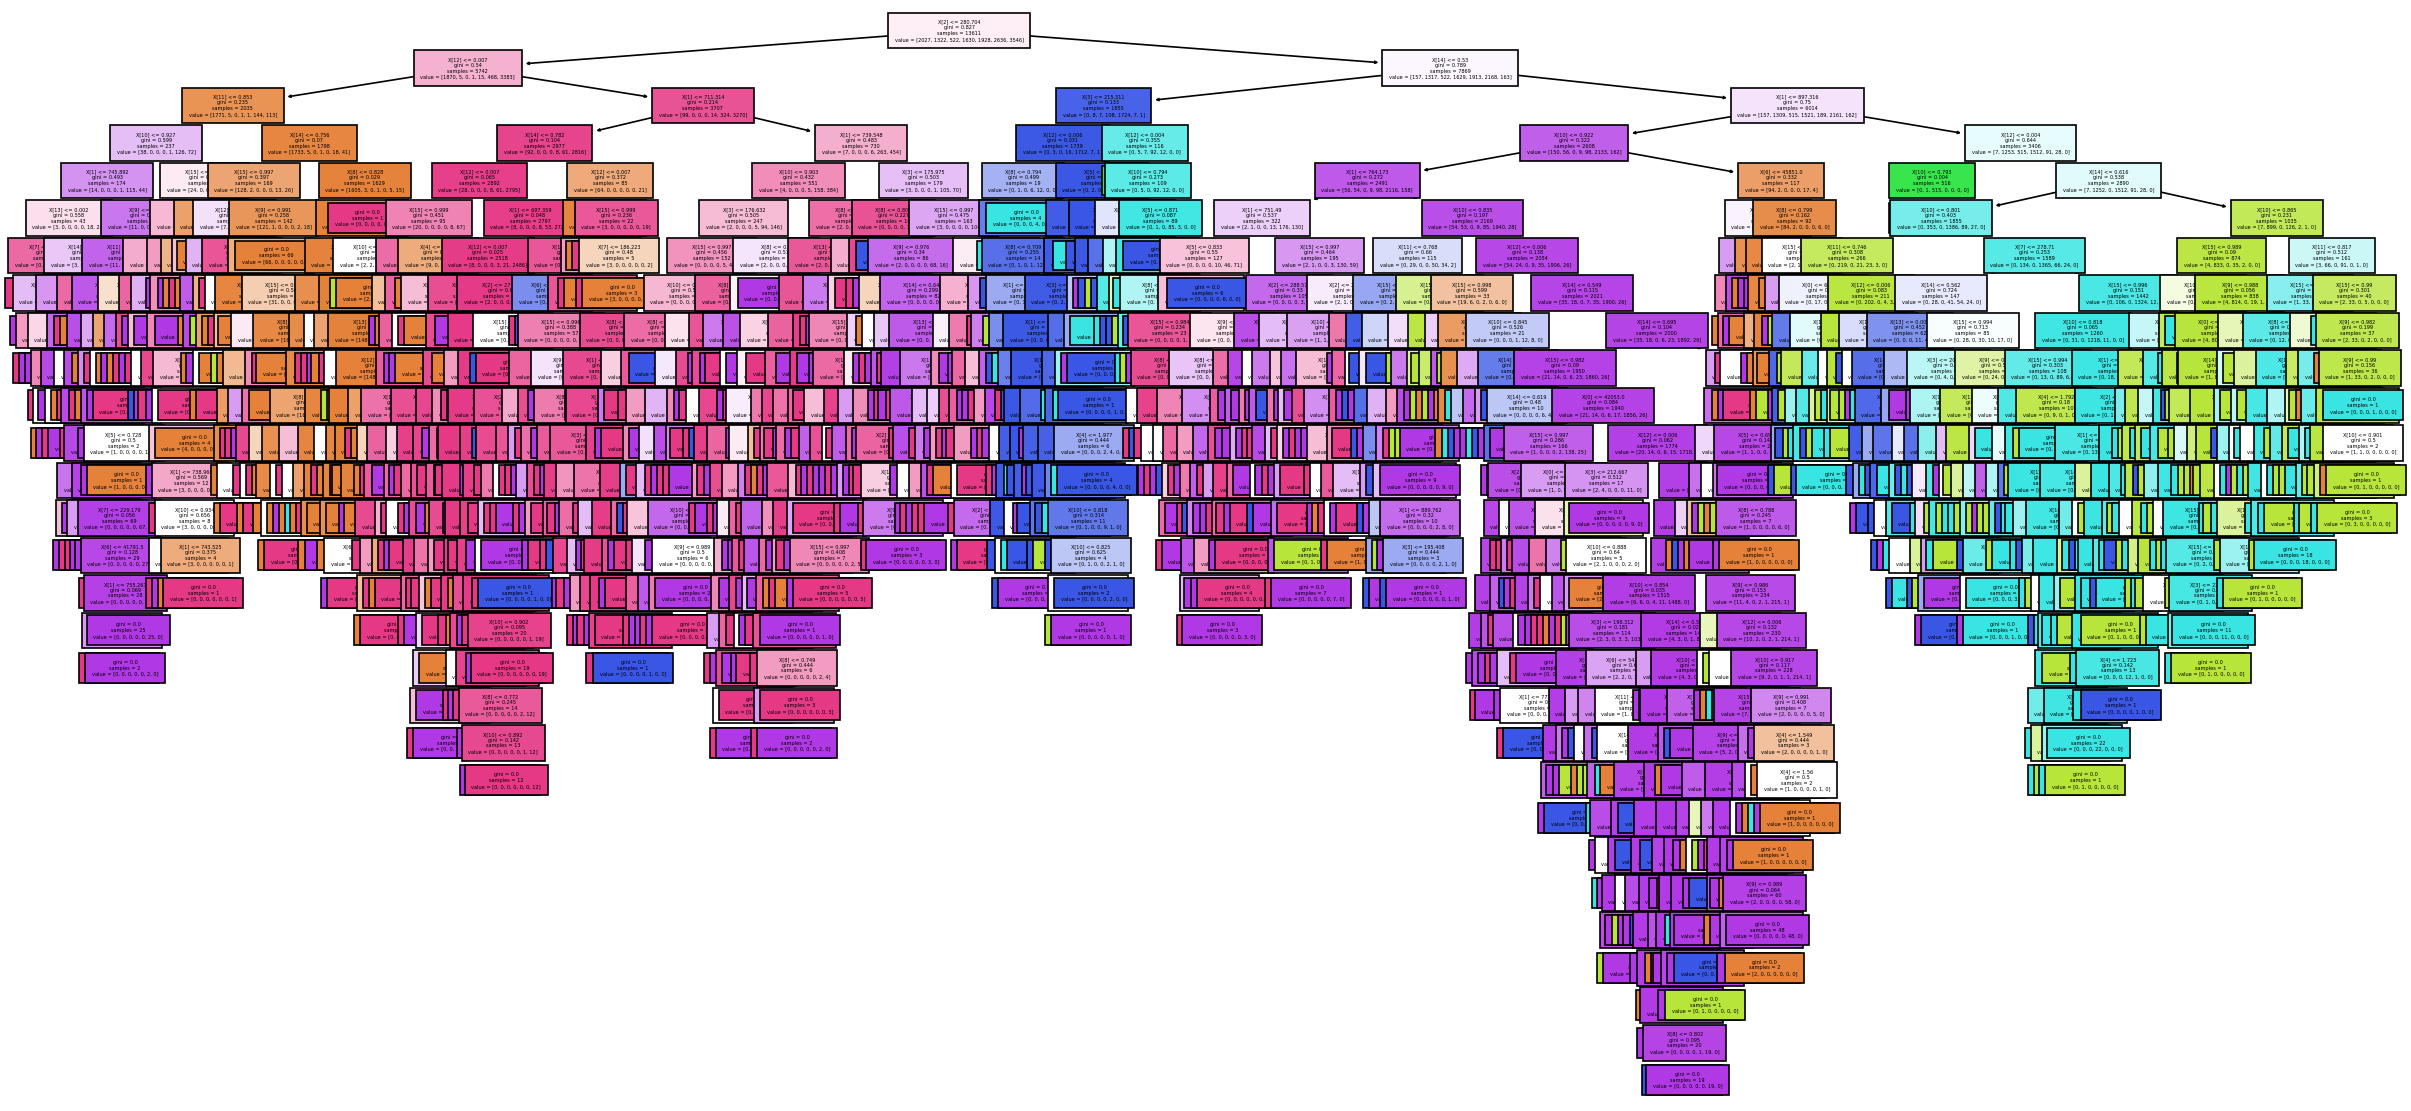

In [244]:
fig = plt.figure(figsize=(25,12), dpi=120)
_ = plot_tree(classTree, 
                filled=True,
                fontsize=3
             )

# Combination of all parameters, depth,  max number of leaf nodes etc.


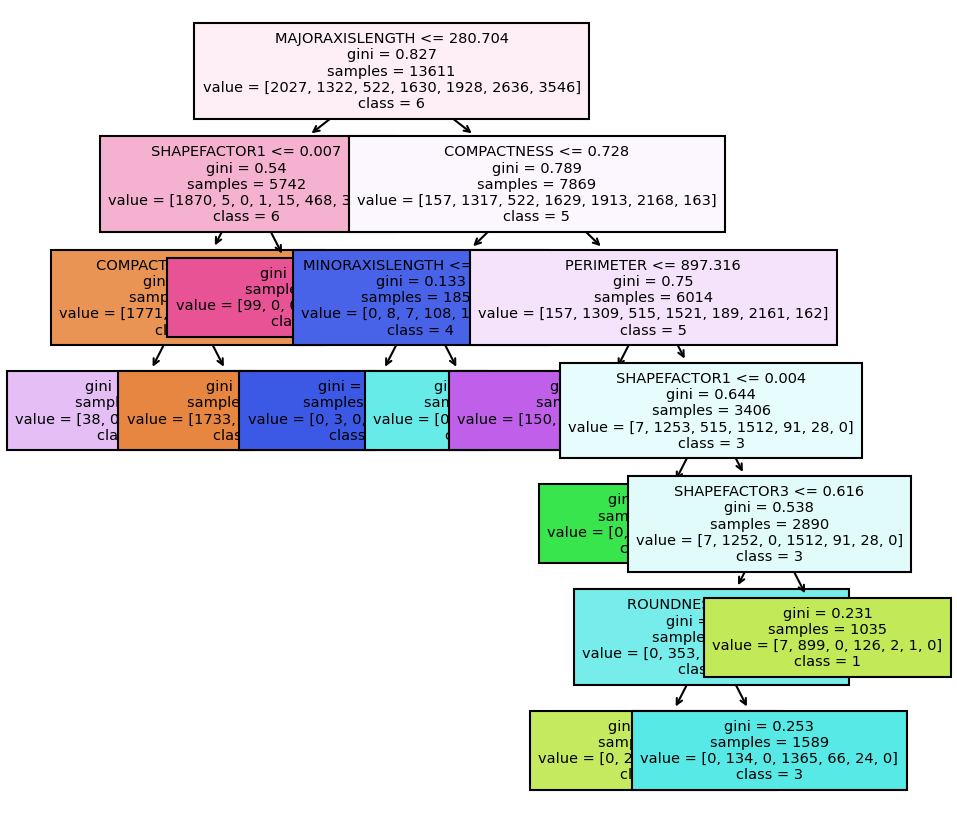

In [205]:
classTree1 = DecisionTreeClassifier(random_state=1, max_depth=40, max_leaf_nodes = 10)
_ = classTree1.fit(X.values, y.values)

fig = plt.figure(figsize=(7,7), dpi=150)
_ = plot_tree(classTree1, 
            feature_names=df.columns, 
            class_names=['0','1','2','3','4','5','6'],
                filled=True,
                fontsize=7
             )

In [245]:
print(f"Accuracy=", accuracy_score(y_test, classTree.predict(X_test)))
print(f"Precision=", precision_score(y_test, classTree.predict(X_test),average='weighted',  zero_division=0))
print(f"Recall=", recall_score(y_test, classTree.predict(X_test),average='weighted'))
print(f"f1=", f1_score(y_test, classTree.predict(X_test),average='weighted'))

Accuracy= 0.3590449954086318
Precision= 0.3538317684578998
Recall= 0.3590449954086318
f1= 0.2493259696753747


# Hyper paramater tuning
## Fitting D-tree with random Search CV

In [44]:
# range of parameters for our random forest 

# Criterion used to guide data splits
criterion = ['mse', 'gini', 'entropy', 'log_loss']

# n_estimators, default = 100
n_estimators =  [int(x) for x in np.linspace(start = 10, stop = 80, num = 10)]
n_estimators =  [2, 3]


# default = None
max_depth = [2, 4]
max_depth.append(None)


# Minimum number of samples required to split a node
# default is 2
min_samples_split = [2, 5]

# Minimum number of samples required at each leaf node
# default = 1 
min_samples_leaf = [1,2]

# max_leaf_nodes  - Grow trees with max_leaf_nodes in best-first fashion.
# If None then unlimited number of leaf nodes.
# default=None 
max_leaf_nodes = [int(x) for x in np.linspace(2, len(y_test), 50)]
max_leaf_nodes.append(None)

# min_impurity_decrease - A node will be split if this split induces a decrease of the impurity greater than or equal to this value.
# default=0.0
min_impurity_decrease = [x for x in np.arange(0.0, 0.01, 0.0001).round(5)]

bootstrap = [True, False] 

# Create the random grid
param_grid_random = { 'criterion': criterion,
                      'max_depth': max_depth,
                      'min_samples_split': min_samples_split,
                      'min_samples_leaf' : min_samples_leaf,
                      'max_leaf_nodes' : max_leaf_nodes,
                      'min_impurity_decrease' : min_impurity_decrease,
                     }


In [45]:
dTree = DecisionTreeClassifier(random_state=1)
best_random_search_model = RandomizedSearchCV(
        estimator=dTree,
        param_distributions=param_grid_random, 
        n_iter = 2, 
        cv=10, 
        verbose=0, 
        n_jobs = -1
    )
_ = best_random_search_model.fit(X_train, y_train.values.ravel())

C:\Users\rahul\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
10 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\rahul\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\rahul\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 969, in fit
    super().fit(
  File "C:\Users\rahul\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 390, in fit
    criterion = CRITERIA_CLF[self.criterion](
KeyError: 'mse'

  warnings.warn(some_fits_failed_message

In [47]:
random_search_best_params = best_random_search_model.best_params_
print('Best parameters found: ', random_search_best_params)

Best parameters found:  {'min_samples_split': 5, 'min_samples_leaf': 2, 'min_impurity_decrease': 0.005, 'max_leaf_nodes': 4334, 'max_depth': 4, 'criterion': 'entropy'}


In [48]:
y_pred = best_random_search_model.predict(X_test)
print(f"{'Model':^18}{'Score':^18}")
print("************************************")
print(f"{'>> Recall Score:':18}{recall_score(y_test, y_pred,average ='weighted')}")
print(f"{'Accuracy Score: ':18}{accuracy_score(y_test, y_pred)}")
print(f"{'Precision Score: ':18}{precision_score(y_test, y_pred,average ='weighted',  zero_division=0)}")
print(f"{'F1 Score: ':18}{f1_score(y_test, y_pred,average ='weighted')}")

      Model             Score       
************************************
>> Recall Score:  0.8639118457300275
Accuracy Score:   0.8639118457300275
Precision Score:  0.8652856086045662
F1 Score:         0.8637239652907565


In [187]:
rforest = RandomForestClassifier(random_state=1)
best_random_search_model = RandomizedSearchCV(
        estimator=rforest, 
        param_distributions=param_grid_random, 
        n_iter = 2, 
        cv=10, 
        verbose=0, 
        n_jobs = -1
    )
_ = best_random_search_model.fit(X_train, y_train.values.ravel())

C:\Users\nihar\new2\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
10 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\nihar\new2\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\nihar\new2\lib\site-packages\sklearn\ensemble\_forest.py", line 450, in fit
    trees = Parallel(
  File "C:\Users\nihar\new2\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\nihar\new2\lib\site-packages\joblib\parallel.py", line 8

In [188]:
random_search_best_params = best_random_search_model.best_params_
print('Best parameters found: ', random_search_best_params)

Best parameters found:  {'min_samples_split': 5, 'min_samples_leaf': 1, 'min_impurity_decrease': 0.0098, 'max_leaf_nodes': 2112, 'max_depth': 4, 'criterion': 'entropy'}


In [189]:
y_pred = best_random_search_model.predict(X_test)

In [190]:
print(f"{'Model':^18}{'Score':^18}")
print("************************************")
print(f"{'>> Recall Score:':18}{recall_score(y_test, y_pred,average ='weighted')}")
print(f"{'Accuracy Score: ':18}{accuracy_score(y_test, y_pred)}")
print(f"{'Precision Score: ':18}{precision_score(y_test, y_pred,average ='weighted')}")
print(f"{'F1 Score: ':18}{f1_score(y_test, y_pred,average ='weighted')}")

      Model             Score       
************************************
>> Recall Score:  0.882277318640955
Accuracy Score:   0.882277318640955
Precision Score:  0.8833630330095505
F1 Score:         0.8819577629855004


## Prediction with GradientBoostingClassifier

* max_depth: The maximum depth per tree. 
    - A deeper tree might increase the performance, but also the complexity and chances to overfit.
    - The value must be an integer greater than 0. Default is None (meaning, the tree can grow to a point where all leaves have 1 observation).
* learning_rate: The learning rate determines the step size at each iteration while your model optimizes toward its objective. 
    - A low learning rate makes computation slower, and requires more rounds to achieve the same reduction in residual error as a model with a high learning rate. But it optimizes the chances to reach the best optimum.
    - Larger learning rates may not converge on a solution.
    - The value must be between 0 and 1. Default is 0.3.
* n_estimators: The number of trees in our ensemble. 
    - Equivalent to the number of boosting rounds.
    - The value must be an integer greater than 0. Default is 100.
* Other tuning parameters similar to DecisionTree's and were covered last class.

In [49]:
max_depth = [10]

learning_rate = [0.1, 0.2 ,0.3]

n_estimators = [int(x) for x in np.linspace(start = 1, stop = 10, num = 1)]

param_gradient = { 
                     'n_estimators' : n_estimators,
                      'learning_rate': learning_rate,
                      'max_depth' : max_depth,
                     }






In [193]:
gboost = GradientBoostingClassifier(random_state=1)
best_random_search_model = RandomizedSearchCV(
        estimator=gboost, 
        param_distributions=param_gradient, 
        n_iter = 2, 
        cv=10, 
        verbose=0, 
        n_jobs = -1
    )
_ = best_random_search_model.fit(X_train, y_train.values.ravel())

In [194]:
random_search_best_params = best_random_search_model.best_params_
print('Best parameters found: ', random_search_best_params)

Best parameters found:  {'n_estimators': 1, 'max_depth': 10, 'learning_rate': 0.2}


In [195]:
y_pred = best_random_search_model.predict(X_test)

In [196]:
print(f"{'Model':^18}{'Score':^18}")
print("************************************")
print(f"{'>> Recall Score:':18}{recall_score(y_test, y_pred,average ='weighted')}")
print(f"{'Accuracy Score: ':18}{accuracy_score(y_test, y_pred)}")
print(f"{'Precision Score: ':18}{precision_score(y_test, y_pred,average ='weighted')}")
print(f"{'F1 Score: ':18}{f1_score(y_test, y_pred,average ='weighted')}")

      Model             Score       
************************************
>> Recall Score:  0.8892561983471075
Accuracy Score:   0.8892561983471075
Precision Score:  0.8943932611824457
F1 Score:         0.8895722200364706


## ADA boost 


In [21]:
aboost = AdaBoostClassifier(random_state=1)


# as with most classifiers, you can experiment with the parameter values
#aboost = AdaBoostClassifier(random_state=random_seed, base_estimator=DecisionTreeClassifier(max_depth=4, random_state=random_seed))
#aboost = AdaBoostClassifier(random_state=random_seed, n_estimators=1000)

In [97]:
learning_rate = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]

n_estimators = [50,100,150,200,250,300,350,400,450,500]

param_gradient = { 
                     'n_estimators' : n_estimators,
                      'learning_rate': learning_rate,
                     }

In [98]:
best_random_search_model_aboost = RandomizedSearchCV(
        estimator=aboost, 
        param_distributions=param_gradient,
        n_iter = 2000, 
        cv=10, 
        verbose=0, 
        n_jobs = -1
    )
_ = best_random_search_model_aboost.fit(X_train, y_train.values.ravel())

C:\Users\nihar\new2\lib\site-packages\sklearn\model_selection\_search.py:292: UserWarning: The total space of parameters 100 is smaller than n_iter=2000. Running 100 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


In [99]:
random_search_best_params_aboost = best_random_search_model_aboost.best_params_
print('Best parameters found: ', best_random_search_model_aboost)

Best parameters found:  RandomizedSearchCV(cv=10, estimator=AdaBoostClassifier(random_state=1),
                   n_iter=2000, n_jobs=-1,
                   param_distributions={'learning_rate': [0.1, 0.2, 0.3, 0.4,
                                                          0.5, 0.6, 0.7, 0.8,
                                                          0.9, 1],
                                        'n_estimators': [50, 100, 150, 200, 250,
                                                         300, 350, 400, 450,
                                                         500]})


In [102]:
y_pred = best_random_search_model_aboost.predict(X_test)

In [103]:
print(f"{'Model':^18}{'Score':^18}")
print("************************************")
print(f"{'>> Recall Score:':18}{recall_score(y_test, y_pred,average ='weighted')}")
print(f"{'Accuracy Score: ':18}{accuracy_score(y_test, y_pred)}")
print(f"{'Precision Score: ':18}{precision_score(y_test, y_pred,average ='weighted')}")
print(f"{'F1 Score: ':18}{f1_score(y_test, y_pred,average ='weighted')}")

      Model             Score       
************************************
>> Recall Score:  0.634159779614325
Accuracy Score:   0.634159779614325
Precision Score:  0.7717023797740525
F1 Score:         0.5966104812803695


## XG BOOST

In [126]:
max_depth = [15]

learning_rate = [0.1, 0.2 ,0.3]

subsample= [0.1, 0.2 ,0.3,0.4,0.5,0.6,0.7,0.8,0.9]

colsample_bytree = [0.1, 0.2 ,0.3,0.4,0.5,0.6,0.7,0.8,0.9]

n_estimators = [int(x) for x in np.linspace(start = 1, stop = 10, num = 1)]

param_gradient = { 
                     'n_estimators' : n_estimators,
                      'learning_rate': learning_rate,
                      'max_depth' : max_depth,
                     'subsample' : subsample,
                     }

In [127]:
xgboost = XGBClassifier(random_state=1)

In [128]:
best_random_search_model_xgboost = RandomizedSearchCV(
        estimator=xgboost, 
        param_distributions=param_gradient,
        n_iter = 2000, 
        cv=10, 
        verbose=0, 
        n_jobs = -1
    )
_ = best_random_search_model_xgboost.fit(X_train, y_train.values.ravel())

C:\Users\nihar\new2\lib\site-packages\sklearn\model_selection\_search.py:292: UserWarning: The total space of parameters 27 is smaller than n_iter=2000. Running 27 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


[18:13:16] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\nihar\new2\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


In [129]:
random_search_best_params_xgboost = best_random_search_model_xgboost.best_params_
print('Best parameters found: ', best_random_search_model_xgboost)

Best parameters found:  RandomizedSearchCV(cv=10,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           enable_categorical=False, gamma=None,
                                           gpu_id=None, importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraint...
                                           n_estimators=100, n_jobs=None,
                                           num_parallel_tree=None,
                

In [130]:
y_pred = best_random_search_model_xgboost.predict(X_test)

In [131]:
print(f"{'Model':^18}{'Score':^18}")
print("************************************")
print(f"{'>> Recall Score:':18}{recall_score(y_test, y_pred,average ='weighted')}")
print(f"{'Accuracy Score: ':18}{accuracy_score(y_test, y_pred)}")
print(f"{'Precision Score: ':18}{precision_score(y_test, y_pred,average ='weighted')}")
print(f"{'F1 Score: ':18}{f1_score(y_test, y_pred,average ='weighted')}")

      Model             Score       
************************************
>> Recall Score:  0.9107438016528926
Accuracy Score:   0.9107438016528926
Precision Score:  0.9103784785624508
F1 Score:         0.9103535371820176


## Analysis:
1. Initially , the k-nn model has provided a good set of performance metrics. The precision, accuracy, recall and f1-score are close to 0.93. which is a good score and will be a good model, but we would like to compare these metrics with other model.
2. We tried fitting a D-tree for our entire dataset without any pruning techniques. The model did poorely against the entire set, with precision, acurcy , recall and f1-score atmost being .3. 
3. So, we tried to prune the D-tree with various parameters, using Hyper parameter tuninng and Random search , we've applied a range of parameters for the D-tree on train dataset. And the tuning was sucesful in giving a best model with all the metrics close to .88. which is clearly an improvement compared to the unprunned D-tree. but not better than our k-nn model.
4. So we tried Gradient boost to see if we can extract an performace gain, this time we had some improvement like 1 percent ( all the metrics are like .89 ).
5.For XG boost , with randomsearchCV we are able to get scores better than Gradient boost and less than k-NN model . the scores for XGboost are close to 0.91.
6. ADA boost when tuned using randomsearchCV got low scores which are close to 0.67.

In conclusion, for the given source dataset(Dry beans) , the best model that for predicting different classes of beans is a k-nn model (9-nn model) with all metrics like precision, recall, acurracy and f1-score close to 93% , which is clearly greater than any of the d-tree models we applied ( with different tuning methods). 
